In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
%matplotlib inline

In [2]:
census_data = pd.read_csv('census_02_2022.csv')
census_data

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Albert Village,Maria,Wood,49.0,Head,Divorced,Female,Chiropodist,None,Catholic
1,1,2,Albert Village,Mohammed,Rose,65.0,Head,Widowed,Male,"Lecturer, further education",None,None
2,2,3,Albert Village,Joe,Smith,23.0,Head,Single,Male,"Investment banker, operational",None,None
3,3,3,Albert Village,Zoe,Daly,61.0,None,Single,Female,"Scientist, research (medical)",None,None
4,4,3,Albert Village,Dominic,Naylor,54.0,None,Single,Male,Microbiologist,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
8221,8221,1,King Spire,Martyn,Robinson,2.0,Son,NaN,Male,Child,None,NaN
8222,8222,1,King Spire,Matthew,Hunt,59.0,Lodger,Single,Male,"Biochemist, clinical",None,Christian
8223,8223,1,King Spire,Victoria,Charlton,23.0,Sibling,Single,Female,Chartered loss adjuster,None,None
8224,8224,1,King Spire,Wayne,Mason,44.0,Lodger,Single,Male,Arboriculturist,None,Catholic


In [3]:
# Dropping unnamed column
census_data = census_data.drop('Unnamed: 0', axis = 1)

In [4]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Albert Village,Maria,Wood,49.0,Head,Divorced,Female,Chiropodist,None,Catholic
1,2,Albert Village,Mohammed,Rose,65.0,Head,Widowed,Male,"Lecturer, further education",None,None
2,3,Albert Village,Joe,Smith,23.0,Head,Single,Male,"Investment banker, operational",None,None
3,3,Albert Village,Zoe,Daly,61.0,None,Single,Female,"Scientist, research (medical)",None,None
4,3,Albert Village,Dominic,Naylor,54.0,None,Single,Male,Microbiologist,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8221,1,King Spire,Martyn,Robinson,2.0,Son,NaN,Male,Child,None,NaN
8222,1,King Spire,Matthew,Hunt,59.0,Lodger,Single,Male,"Biochemist, clinical",None,Christian
8223,1,King Spire,Victoria,Charlton,23.0,Sibling,Single,Female,Chartered loss adjuster,None,None
8224,1,King Spire,Wayne,Mason,44.0,Lodger,Single,Male,Arboriculturist,None,Catholic


In [5]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   8226 non-null   object 
 1   Street                         8226 non-null   object 
 2   First Name                     8226 non-null   object 
 3   Surname                        8226 non-null   object 
 4   Age                            8226 non-null   float64
 5   Relationship to Head of House  8226 non-null   object 
 6   Marital Status                 6258 non-null   object 
 7   Gender                         8226 non-null   object 
 8   Occupation                     8226 non-null   object 
 9   Infirmity                      8226 non-null   object 
 10  Religion                       6199 non-null   object 
dtypes: float64(1), object(10)
memory usage: 707.0+ KB


In [6]:
## lets check the columns that has null values

In [7]:
census_data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1968
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2027
dtype: int64

In [8]:
# checking info about the data
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   8226 non-null   object 
 1   Street                         8226 non-null   object 
 2   First Name                     8226 non-null   object 
 3   Surname                        8226 non-null   object 
 4   Age                            8226 non-null   float64
 5   Relationship to Head of House  8226 non-null   object 
 6   Marital Status                 6258 non-null   object 
 7   Gender                         8226 non-null   object 
 8   Occupation                     8226 non-null   object 
 9   Infirmity                      8226 non-null   object 
 10  Religion                       6199 non-null   object 
dtypes: float64(1), object(10)
memory usage: 707.0+ KB


# Data Cleaning


## House number

In [9]:
# to bring out all values in House Number
# Four is incorrect data format of object needs to be converted to int
census_data['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [10]:
# to check for empty spaces
census_data[census_data['House Number'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [11]:
# replacing Four with 4
census_data = census_data.replace({'House Number':{'Four': 4}})

In [12]:
census_data['House Number'] = census_data['House Number'].astype(float).astype('int64')
census_data['House Number'].dtype

dtype('int64')

In [13]:
census_data['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Street 

In [14]:
# to bring out all values in street
census_data['Street'].unique()

array(['Albert Village', 'Waterloo Estates', 'Andrews Wells',
       'Clementine Street', 'Duffy Ramp', 'Watson Lane',
       'Jarvis Parkways', 'Strawberrydraw Street', 'Thompson Drive',
       'Wakefield Lane', 'Roberts Lane', 'Salmon Drive', 'Laurel Valley',
       'Alba Drive', 'Campbell Tunnel', 'Doherty Valley',
       'Arthurfold Street', 'Thompson View', 'Baker Drive', 'Ali Ways',
       'Testament Road', 'Charity Flats', 'Smith Summit',
       'Russell Avenue', 'Hullpond Street', 'Harper Trail',
       'Parrot Drive', 'Regent Road', 'Gilbert Inlet', 'Parry Street',
       'Manchester Summit', 'Gregory Cove', 'Coin Street', 'Miller Pines',
       'Stephenson Views', 'Smith Cliffs', 'Exchange Road', 'Walton Road',
       'Gallows Avenue', 'Williamson Plains', 'Butler Harbor',
       'Henge Lane', 'Rogers Drive', 'Smith Course', 'Breakfast Avenue',
       'Miller Knoll', 'Ward Street', 'Preston Groves', 'Jones Ramp',
       'Chester Views', 'Yellow Loop', 'Innerfast Lane', 'Hawki

In [15]:
# to check for empty spaces
census_data[census_data['Street'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [16]:
# to check for empty spaces
census_data['Street'].str.isspace().sum()

0

#  first name

In [17]:
# to bring out all values in first name
census_data['First Name'].unique()

array(['Maria', 'Mohammed', 'Joe', 'Zoe', 'Dominic', 'Lawrence', 'Jason',
       'Gemma', 'Charlotte', 'Julie', 'Katherine', 'Gillian', 'Denis',
       'Jacqueline', 'Charlie', 'Paige', 'Douglas', 'Irene', 'Connor',
       'Cheryl', 'Sean', 'Andrea', 'Lucy', 'Barry', 'Shaun', 'Jodie',
       'Alison', 'Marion', 'Guy', 'Jeffrey', 'Lisa', 'Alex', 'Josh',
       'Barbara', 'Frank', 'Karen', 'Tracey', 'George', 'Deborah', 'Paul',
       'Reece', 'Annette', 'Angela', 'Malcolm', 'Eric', 'Rachel',
       'Louise', 'Dean', 'Stephanie', 'Brian', 'Kelly', 'Bethany',
       'Oliver', 'Mary', 'Stewart', 'Richard', 'Jasmine', 'Mitchell',
       'Jane', 'Wayne', 'Grace', 'Lynn', 'Sian', 'Gordon', 'Geoffrey',
       'Beth', 'Paula', 'Naomi', 'Hollie', 'Duncan', 'Hilary', 'Carly',
       'Katy', 'Hugh', 'Craig', 'Phillip', 'Jack', 'Alice', 'Anna',
       'Shane', 'Christine', 'Anne', 'Pamela', 'Helen', 'Gerald',
       'Patricia', 'Ross', 'Kirsty', 'Darren', 'Teresa', 'Graeme',
       'Jessica', 'Caro

In [18]:
# to check for empty spaces
census_data[census_data['First Name'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [19]:
# to check for empty spaces
census_data['First Name'].str.isspace().sum()

0

# Surname name

In [20]:
# to bring out all values in surname
census_data['Surname'].unique()

array(['Wood', 'Rose', 'Smith', 'Daly', 'Naylor', 'Noble', 'Fletcher',
       'Williams', 'Hart', 'Harrison', 'Reed', 'Robinson', 'Hughes',
       'Chambers', 'King', 'Clark', 'Walters', 'Hill', 'Baker',
       'Sinclair', 'Turner', 'Hall', 'Harris', 'Young', 'Grant', 'Jones',
       'Owen', 'Cooper', 'Carter', 'Khan', 'Coates', 'Webster',
       'Alexander', 'Bull', 'Jackson', 'Smart', 'Watson', 'Davies',
       'Collins', 'Wright', 'Taylor', 'Francis', 'Richards', "O'Connor",
       'Waters', 'Dixon-Waters', 'Gardner', 'Watkins', 'Harvey', 'Adams',
       'Jones-Adams', 'Howard', 'Wyatt', 'Schofield', 'Haynes', 'Hammond',
       'Wade', 'Reid', 'Shah', 'Martin', 'Brown', 'Humphries',
       'Macdonald', 'Hartley', 'Farmer', 'Lewis', 'Owens', 'Stewart',
       'Webb', 'Cole', 'Page', 'Ryan', 'Lloyd', 'Shepherd', 'Tucker',
       'Jordan', 'Johnson', 'Bowen', 'Brookes-Williams', 'Bird', 'Pope',
       'Stanley', 'Jackson-Harrison', 'Cross', 'Brady', 'Thomas', 'Frost',
       'Lewis-Fro

In [21]:
# to check for blank spaces
census_data[census_data['Surname'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2311,10,Stephenson Views,Adrian,,59.0,None,Single,Male,"Engineer, civil (consulting)",None,Christian


In [22]:
# to check for empty spaces
census_data[census_data['Surname'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2311,10,Stephenson Views,Adrian,,59.0,None,Single,Male,"Engineer, civil (consulting)",None,Christian


In [23]:
# Adrian is aged 59 and single but has no surname which needs to be resolved
# lets try to find a common denominator based on other house occupants by subsetting
census_data[(census_data['House Number'] ==10)&(census_data['Street'] =='Stephenson Views')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2307,10,Stephenson Views,Jodie,Curtis,38.0,Head,Single,Female,Retail manager,None,None
2308,10,Stephenson Views,Bethan,Stanley,60.0,None,Single,Female,Research scientist (life sciences),None,Christian
2309,10,Stephenson Views,Phillip,Allan,31.0,None,Single,Male,Drilling engineer,None,None
2310,10,Stephenson Views,Charlie,Jones,22.0,None,Single,Male,University Student,None,None
2311,10,Stephenson Views,Adrian,,59.0,None,Single,Male,"Engineer, civil (consulting)",None,Christian


In [24]:
# hence we replace empty surname with firstname
census_data['Surname'] = census_data['Surname'].replace(' ', 'Adrian')

In [25]:
census_data[(census_data['House Number'] ==10) & (census_data['Street'] =='Stephenson Views')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2307,10,Stephenson Views,Jodie,Curtis,38.0,Head,Single,Female,Retail manager,None,None
2308,10,Stephenson Views,Bethan,Stanley,60.0,None,Single,Female,Research scientist (life sciences),None,Christian
2309,10,Stephenson Views,Phillip,Allan,31.0,None,Single,Male,Drilling engineer,None,None
2310,10,Stephenson Views,Charlie,Jones,22.0,None,Single,Male,University Student,None,None
2311,10,Stephenson Views,Adrian,Adrian,59.0,None,Single,Male,"Engineer, civil (consulting)",None,Christian


#  Age

In [26]:
# to bring out all values in Age
census_data['Age'].unique()

array([ 49.        ,  65.        ,  23.        ,  61.        ,
        54.        ,  66.        ,  71.        ,  67.        ,
        55.        ,  22.        ,  18.        ,  82.        ,
        85.        ,  75.        ,  29.        ,  69.        ,
        38.        ,  39.        ,  30.        ,  35.        ,
        60.        ,  73.        ,   6.        ,  46.        ,
        25.        ,  36.        ,  64.        ,  47.        ,
        48.        ,  15.        ,  52.        ,   3.        ,
        44.        ,  26.        ,  17.        ,  33.        ,
        28.        ,   1.        ,  81.        ,  16.        ,
        13.        ,  53.        ,  11.        ,   4.        ,
        37.        ,   2.        ,  84.        ,  43.        ,
        42.        ,   9.        ,  50.        ,  21.        ,
        20.        ,   0.        ,  24.        ,  14.        ,
        83.        ,  89.        ,  12.        ,  34.        ,
         5.        ,  27.        ,  10.        ,   8.  

In [27]:
# to check for empty spaces
census_data[census_data['Age'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [28]:
# check for the datatype in Age
census_data['Age'].dtype

dtype('float64')

In [29]:
census_data['Age'] = census_data['Age'].astype(float).astype('int64')
census_data['Age'].dtype

dtype('int64')

In [30]:
census_data['Age'].unique()

array([ 49,  65,  23,  61,  54,  66,  71,  67,  55,  22,  18,  82,  85,
        75,  29,  69,  38,  39,  30,  35,  60,  73,   6,  46,  25,  36,
        64,  47,  48,  15,  52,   3,  44,  26,  17,  33,  28,   1,  81,
        16,  13,  53,  11,   4,  37,   2,  84,  43,  42,   9,  50,  21,
        20,   0,  24,  14,  83,  89,  12,  34,   5,  27,  10,   8,   7,
        51,  59,  56,  76,  63,  19,  41,  62,  31,  79,  78,  77,  32,
        68,  45,  58,  57,  74,  72,  40,  70,  88, 105,  87,  91,  80,
        86,  93,  96, 101, 104,  94,  99,  90,  92,  95, 102], dtype=int64)

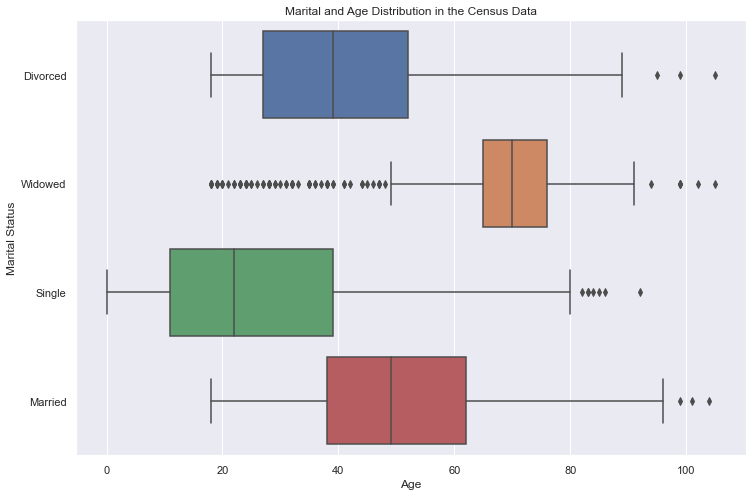

In [126]:
plt.figure(figsize = (12,8))
box = sns.boxplot(y = census_data['Marital Status'], x = census_data['Age'])
box.set(xlabel ='Age', ylabel = 'Marital Status', title = 'Marital and Age Distribution in the Census Data')
plt.show()

In [32]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Albert Village,Maria,Wood,49,Head,Divorced,Female,Chiropodist,None,Catholic
1,2,Albert Village,Mohammed,Rose,65,Head,Widowed,Male,"Lecturer, further education",None,None
2,3,Albert Village,Joe,Smith,23,Head,Single,Male,"Investment banker, operational",None,None
3,3,Albert Village,Zoe,Daly,61,None,Single,Female,"Scientist, research (medical)",None,None
4,3,Albert Village,Dominic,Naylor,54,None,Single,Male,Microbiologist,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8221,1,King Spire,Martyn,Robinson,2,Son,NaN,Male,Child,None,NaN
8222,1,King Spire,Matthew,Hunt,59,Lodger,Single,Male,"Biochemist, clinical",None,Christian
8223,1,King Spire,Victoria,Charlton,23,Sibling,Single,Female,Chartered loss adjuster,None,None
8224,1,King Spire,Wayne,Mason,44,Lodger,Single,Male,Arboriculturist,None,Catholic


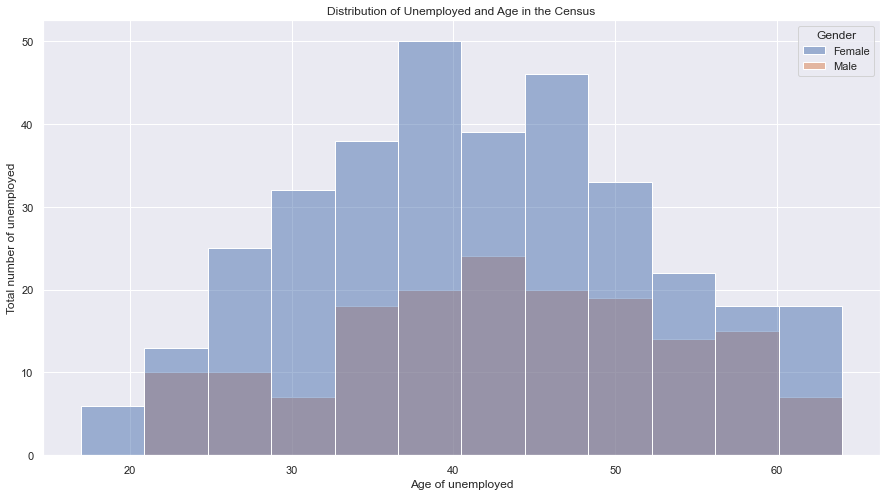

In [127]:
#visualizing the Distribution of Age in the Census
plt.figure(figsize = (15,8))

sns.histplot(x = 'Age',  data = young_unemployed, hue ='Gender')
plt.xlabel('Age of unemployed')
plt.ylabel('Total number of unemployed')
plt.title('Distribution of Unemployed and Age in the Census')
plt.show()

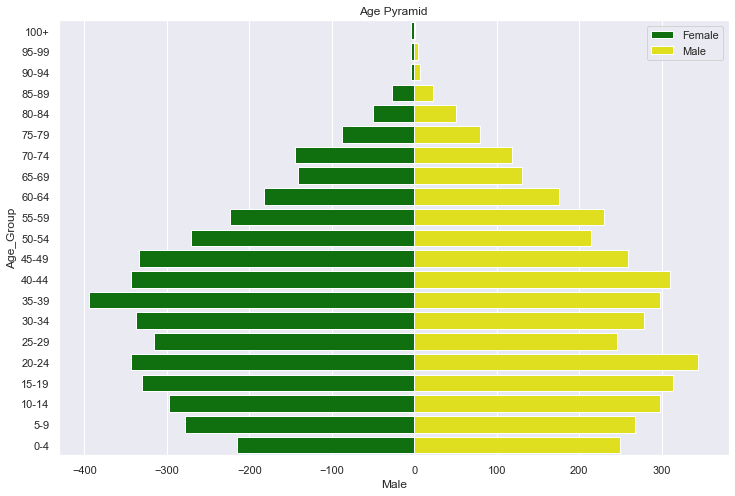

In [129]:
age_list = []
for age in census_data['Age']:
    if age <= 4:
        age_list.append('0-4')
    elif age >= 5 and age < 10:
        age_list.append('5-9')
    elif age >= 10 and age < 15:
        age_list.append('10-14')
    elif age >= 15 and age < 20:
        age_list.append('15-19')
    elif age >= 20 and age < 25:
        age_list.append('20-24')
    elif age >= 25 and age < 30:
        age_list.append('25-29')
    elif age >= 30 and age < 35:
        age_list.append('30-34')
    elif age >= 35 and age < 40:
        age_list.append('35-39')
    elif age >= 40 and age < 45:
        age_list.append('40-44')
    elif age >= 45 and age < 50:
        age_list.append('45-49')
    elif age >= 50 and age < 55:
        age_list.append('50-54')
    elif age >= 55 and age < 60:
        age_list.append('55-59')
    elif age >= 60 and age < 65:
        age_list.append('60-64')
    elif age >= 65 and age < 70:
        age_list.append('65-69')
    elif age >= 70 and age < 75:
        age_list.append('70-74')
    elif age >= 75 and age < 80:
        age_list.append('75-79')
    elif age >= 80 and age < 85:
        age_list.append('80-84')
    elif age >= 85 and age < 90:
        age_list.append('85-89')
    elif age >= 90 and age < 95:
        age_list.append('90-94')
    elif age >= 95 and age < 100:
        age_list.append('95-99')
    else:
        age_list.append('100+')
    
census_data['Age_Group']  = age_list
male_group = census_data['Age_Group'][census_data.Gender == 'Male'].value_counts().sort_index()
female_group = census_data['Age_Group'][census_data.Gender == 'Female'].value_counts().sort_index()
age_df = pd.DataFrame({
    'Male': male_group,
    'Female':-1 * female_group
})

age_df.index.names = ['Age_Group']
age_df.reset_index(inplace=True)
age_df


order_list = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59',\
              '50-54', '45-49', '40-44','35-39', '30-34', '25-29', '20-24', '15-19','10-14', '5-9','0-4']
age_pyramid = sns.barplot(x='Female', y='Age_Group', data=age_df, color=('green'), order=order_list, label='Female') 
age_pyramid = sns.barplot(x='Male', y='Age_Group', data=age_df, color=('yellow'), order=order_list, label='Male') 
 
age_pyramid.legend() 
plt.title('Age Pyramid') 
sns.set(rc = {'figure.figsize':(17,10)})

In [154]:
census_data["Age"].describe()

count    8226.000000
mean       35.490883
std        21.328976
min         0.000000
25%        18.000000
50%        34.000000
75%        50.000000
max       105.000000
Name: Age, dtype: float64

In [132]:
## OBSERVATION
# high life expectancy in population bcos people are living from 90 to 100
# there is little increase or minimal growth in the population because we have more peeple in the reprodcutive age (15-45)
#than in the Pre Reproductive age(0-14)

## relationship to head of house 

In [35]:
# to bring out all values in first name
census_data['Relationship to Head of House'].unique()

array(['Head', 'None', 'Wife', 'Daughter', 'Husband', 'Cousin', 'Son',
       'Lodger', 'Partner', 'Sibling', 'Visitor', 'Step-Son',
       'Granddaughter', 'Adopted Son', 'Grandson', 'Step-Daughter',
       'Neice', 'Nephew', 'Adopted Grandson', 'Adopted Daughter',
       'Adopted Granddaughter', 'Daughter-in-law'], dtype=object)

In [36]:
# to check for blank spaces
census_data[census_data['Relationship to Head of House'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group


In [37]:
# to check for empty spaces
census_data[census_data['Relationship to Head of House'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group


In [38]:
# to check the person with none
census_data[census_data['Relationship to Head of House'] =='None']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group
3,3,Albert Village,Zoe,Daly,61,None,Single,Female,"Scientist, research (medical)",None,None,60-64
4,3,Albert Village,Dominic,Naylor,54,None,Single,Male,Microbiologist,None,Christian,50-54
125,29,Andrews Wells,Eric,Humphries,35,None,Single,Male,"Research officer, trade union",None,Catholic,35-39
126,29,Andrews Wells,Dominic,Macdonald,46,None,Single,Male,"Engineer, maintenance (IT)",None,Christian,45-49
127,29,Andrews Wells,Sean,Hartley,51,None,Single,Male,Environmental education officer,None,Christian,50-54
...,...,...,...,...,...,...,...,...,...,...,...,...
8152,1,Wayward Rocks,Elliott,Phillips,50,None,Single,Male,Unemployed,None,None,50-54
8153,1,Wayward Rocks,Scott,Lloyd,20,None,Single,Male,University Student,None,None,20-24
8154,1,Wayward Rocks,Irene,Wilson,48,None,Single,Female,Dramatherapist,None,Christian,45-49
8155,1,Wayward Rocks,Sylvia,Khan,63,None,Single,Female,Exhibition designer,None,Christian,60-64


In [39]:
census_data[(census_data['Relationship to Head of House'] == 'None') & (census_data['Marital Status'] == 'Single')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group
3,3,Albert Village,Zoe,Daly,61,None,Single,Female,"Scientist, research (medical)",None,None,60-64
4,3,Albert Village,Dominic,Naylor,54,None,Single,Male,Microbiologist,None,Christian,50-54
125,29,Andrews Wells,Eric,Humphries,35,None,Single,Male,"Research officer, trade union",None,Catholic,35-39
126,29,Andrews Wells,Dominic,Macdonald,46,None,Single,Male,"Engineer, maintenance (IT)",None,Christian,45-49
127,29,Andrews Wells,Sean,Hartley,51,None,Single,Male,Environmental education officer,None,Christian,50-54
...,...,...,...,...,...,...,...,...,...,...,...,...
8152,1,Wayward Rocks,Elliott,Phillips,50,None,Single,Male,Unemployed,None,None,50-54
8153,1,Wayward Rocks,Scott,Lloyd,20,None,Single,Male,University Student,None,None,20-24
8154,1,Wayward Rocks,Irene,Wilson,48,None,Single,Female,Dramatherapist,None,Christian,45-49
8155,1,Wayward Rocks,Sylvia,Khan,63,None,Single,Female,Exhibition designer,None,Christian,60-64


In [40]:
census_data[(census_data['Relationship to Head of House'] == 'None') & (census_data['Marital Status'] == 'Divorced')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group
619,43,Roberts Lane,Denis,Clarke,28,None,Divorced,Male,Industrial buyer,None,None,25-29
1080,31,Thompson View,Tracy,Gibbs,46,None,Divorced,Female,Plant breeder/geneticist,None,Christian,45-49
1353,6,Testament Road,Laura,Forster,27,None,Divorced,Female,Unemployed,None,None,25-29
1740,44,Parrot Drive,Janice,Burton,32,None,Divorced,Female,Restaurant manager,None,None,30-34
1742,44,Parrot Drive,Nicole,Murphy,45,None,Divorced,Female,Professor Emeritus,None,None,45-49
1865,24,Gilbert Inlet,Jacqueline,Mann,18,None,Divorced,Female,Student,None,NaN,15-19
2212,5,Coin Street,Katherine,Holmes,29,None,Divorced,Female,Trade union research officer,None,None,25-29
2433,55,Stephenson Views,Lynn,Lucas,52,None,Divorced,Female,Armed forces operational officer,None,Catholic,50-54
3377,24,Miller Knoll,Charlene,Fitzgerald,36,None,Divorced,Female,Clinical cytogeneticist,None,Christian,35-39
3559,29,Preston Groves,Jake,Parsons,58,None,Divorced,Male,Higher education lecturer,None,None,55-59


In [41]:
census_data[(census_data['Relationship to Head of House'] == 'None') & (census_data['Marital Status'] == 'Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group
926,6,Thompson View,Joan,Williams,52,None,Married,Female,"Psychologist, educational",None,Methodist,50-54
927,6,Thompson View,Max,Williams,53,None,Married,Male,Astronomer,None,Methodist,50-54
1086,32,Thompson View,Marie,Brown,53,None,Married,Female,Patent examiner,None,Christian,50-54
1087,32,Thompson View,Dominic,Brown,52,None,Married,Male,Film/video editor,None,Christian,50-54
3072,46,Butler Harbor,Gillian,Bentley,53,None,Married,female,Unemployed,None,None,50-54
3073,46,Butler Harbor,John,Bentley,54,None,Married,Male,Public librarian,None,None,50-54
3725,17,Chester Views,Duncan,O'Connor,64,None,Married,Male,Warden/ranger,None,Christian,60-64
3726,17,Chester Views,Eleanor,O'Connor,63,None,Married,Female,Telecommunications researcher,None,Christian,60-64
4470,40,Harris Lane,Philip,Flynn,36,None,Married,Male,"Horticulturist, amenity",None,Christian,35-39
4471,40,Harris Lane,Jodie,Flynn,33,None,Married,Female,Geophysicist/field seismologist,None,Christian,30-34


In [42]:
census_data[(census_data['Relationship to Head of House'] == 'None') & (census_data['Marital Status'] == 'NA')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group


In [43]:
census_data[(census_data['Relationship to Head of House'] == 'None') & (census_data['Marital Status'] == 'Divorced')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group
619,43,Roberts Lane,Denis,Clarke,28,None,Divorced,Male,Industrial buyer,None,None,25-29
1080,31,Thompson View,Tracy,Gibbs,46,None,Divorced,Female,Plant breeder/geneticist,None,Christian,45-49
1353,6,Testament Road,Laura,Forster,27,None,Divorced,Female,Unemployed,None,None,25-29
1740,44,Parrot Drive,Janice,Burton,32,None,Divorced,Female,Restaurant manager,None,None,30-34
1742,44,Parrot Drive,Nicole,Murphy,45,None,Divorced,Female,Professor Emeritus,None,None,45-49
1865,24,Gilbert Inlet,Jacqueline,Mann,18,None,Divorced,Female,Student,None,NaN,15-19
2212,5,Coin Street,Katherine,Holmes,29,None,Divorced,Female,Trade union research officer,None,None,25-29
2433,55,Stephenson Views,Lynn,Lucas,52,None,Divorced,Female,Armed forces operational officer,None,Catholic,50-54
3377,24,Miller Knoll,Charlene,Fitzgerald,36,None,Divorced,Female,Clinical cytogeneticist,None,Christian,35-39
3559,29,Preston Groves,Jake,Parsons,58,None,Divorced,Male,Higher education lecturer,None,None,55-59


# marital status

In [44]:
# to bring out all values in marital status
census_data['Marital Status'].unique()

array(['Divorced', 'Widowed', 'Single', 'Married', nan, 'D', 'M', 'W',
       'S'], dtype=object)

In [45]:
# to check for missing value from nan above
census_data[census_data['Marital Status'] == 'nan']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group


In [46]:
# check for empty values
census_data['Marital Status'].str.isspace().sum()

0

In [47]:
# replacing D for divorce, M for married, W for widowed and S for single
census_data['Marital Status'] = census_data['Marital Status'].replace({'D':'Divorced', 'M':'Married', 'W':'Widowed', 'S':'Single', np.nan:'Single'})

In [48]:
census_data['Marital Status'].unique()

array(['Divorced', 'Widowed', 'Single', 'Married'], dtype=object)

In [49]:
census_data['Gender'].unique()

array(['Female', 'Male', 'male', 'M', 'female', 'f', 'F', ' ', 'm'],
      dtype=object)

In [50]:
# convert m to male and f to female
census_data['Gender'] = census_data['Gender'].replace({'M':'Male', 'm':'Male', 'F':'Female', 'f':'Female', ' ':'Female', 'male':'Male', 'female':'Female'})

In [51]:
census_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

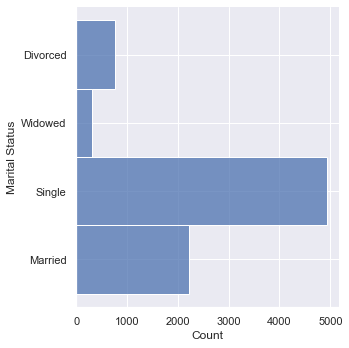

In [52]:
sns.displot(census_data, y='Marital Status')

<AxesSubplot:xlabel='Age', ylabel='Marital Status'>

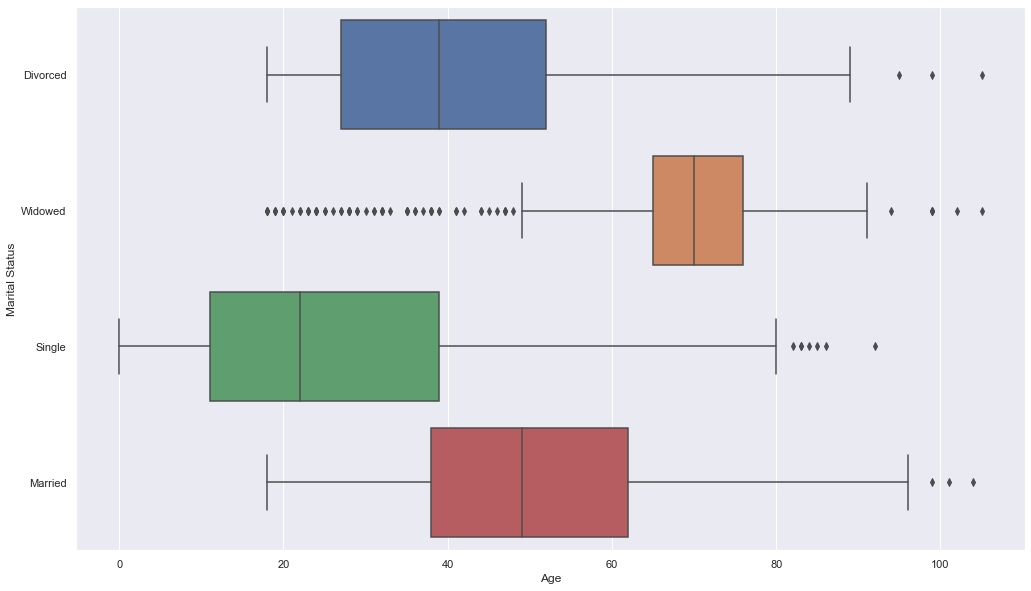

In [53]:
sns.boxplot(x=census_data["Age"], y=census_data["Marital Status"],data=census_data)

In [54]:
census_data["Marital Status"].value_counts().nlargest(60)

Single      4928
Married     2220
Divorced     759
Widowed      319
Name: Marital Status, dtype: int64

#  occupation

In [55]:
# to bring out all values of occupation
census_data['Occupation'].unique()

array(['Chiropodist', 'Lecturer, further education',
       'Investment banker, operational', ...,
       'Retired Librarian, academic', 'Retired Oceanographer',
       'Retired Publishing rights manager'], dtype=object)

In [56]:
# to check for empty spaces
census_data[census_data['Occupation'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group


In [57]:
# checking for blank spaces
census_data['Occupation'].str.isspace().sum()

0

#### (iii) Train station. There are potentially a lot of commuters in the town and building a train 
#### station could take pressure off the roads. But how will you identify commuters? 

In [58]:
census_data["Occupation"].value_counts().nlargest(60)

Student                                                        1608
University Student                                              576
Unemployed                                                      554
Child                                                           464
PhD Student                                                      22
Field seismologist                                               15
Meteorologist                                                    15
Scientist, water quality                                         14
Site engineer                                                    14
Merchant navy officer                                            14
Technical author                                                 14
Psychologist, educational                                        14
Scientist, clinical (histocompatibility and immunogenetics)      13
Control and instrumentation engineer                             13
Ambulance person                                

In [59]:
census_data[census_data['Occupation'] == 'Unemployed']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group
8,1,Waterloo Estates,Charlotte,Williams,55,Head,Single,Female,Unemployed,None,None,55-59
24,12,Waterloo Estates,Shaun,Baker,54,Head,Single,Male,Unemployed,None,Christian,50-54
31,18,Waterloo Estates,Alex,Grant,64,Head,Single,Male,Unemployed,Physical Disability,None,60-64
45,4,Andrews Wells,Charlotte,Bull,61,Head,Single,Female,Unemployed,None,Christian,60-64
50,5,Andrews Wells,Stephanie,Jackson,33,Head,Single,Female,Unemployed,None,Christian,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...
8152,1,Wayward Rocks,Elliott,Phillips,50,None,Single,Male,Unemployed,None,None,50-54
8161,1,Williams Barn,Valerie,Coleman,34,Daughter,Single,Female,Unemployed,None,None,30-34
8180,1,Manor Tower,Helen,Powell,41,Head,Single,Female,Unemployed,None,None,40-44
8212,1,Bryant Ranch,Edward,Williams,60,Lodger,Divorced,Male,Unemployed,None,None,60-64


In [60]:
# calculate percentage of old people
old_population = census_data[census_data['Age'] == 'age'].count()
old_population

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age_Group                        0
dtype: int64

In [61]:
# calculate percentage of unemplyed people.
unemployed_population = census_data[census_data['Occupation'] == 'Unemployed'].count()
no_of_unemployed = unemployed_population['Occupation']
no_of_unemployed

554

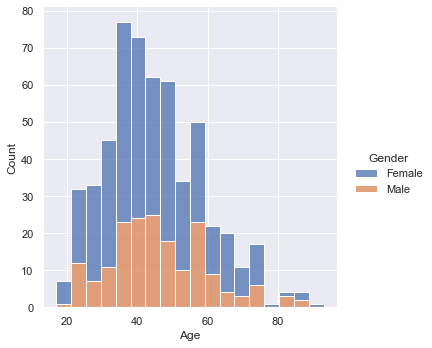

In [62]:
# unemployed persons are concentrated within the ages of 30 to 50
unemployed = census_data[census_data['Occupation']=="Unemployed"]

sns.displot(x=unemployed['Age'], hue=unemployed['Gender'], multiple='stack')

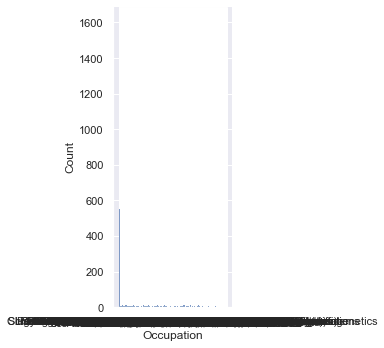

In [63]:
sns.displot(census_data, x='Occupation')

In [64]:
#the percentage of unemployed persons
(554/8226)*100

6.734743496231461

In [65]:
#Higher education lecturer     
#Aeronautical engineer
# The top 60 occupation in the town was examined and only about two clear commuters were found.
# meaning that ((len(census_data)/60)*2) approximately 274 commuters were identified in the 
#entire population which accounts for only approxinmately 4% of the entire population
# Therefore , it will not be worthwhile to build a train station

In [66]:
len(census_data)

8226

In [67]:
(274/8226)*100

3.3309020179917335

In [68]:
print(census_data['Employment Status'].value_counts())

plt.figure(figsize = (15,8))
sns.countplot(y = 'Employment Status', data=census_data)

plt.title('Distribution of Employment Status in the Census')
plt.ylabel('Total Number Recorded')
plt.show()

KeyError: 'Employment Status'

## Infirmity

In [69]:
# to bring out all infirmity
census_data['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Physical Disability', 'Deaf',
       'Blind', 'Mental Disability', 'Disabled', ' '], dtype=object)

In [70]:
# to check for empty spaces
census_data[census_data['Infirmity'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group
2180,48,Gregory Cove,Jennifer,Ross,42,None,Single,Female,Equality and diversity officer,,None,40-44
3094,52,Butler Harbor,Patricia,Hutchinson,52,None,Single,Female,Immigration officer,,None,50-54
4562,41,Bletchleybird Drive,Glenn,Burton,61,Husband,Married,Male,Public librarian,,Christian,60-64
5247,54,High Streets,Samuel,Hill,20,None,Single,Male,University Student,,Catholic,20-24
5412,101,High Streets,Christopher,Holland,44,Partner,Single,Male,Administrator,,None,40-44


In [71]:
# checking for blank spaces
census_data['Infirmity'].str.isspace().sum()

5

In [72]:
# replacing blank spaces with 'None'
# none does not have any disability, change empty space to none
census_data['Infirmity'] = census_data['Infirmity'].replace({' ':'None'})

In [73]:
# number of people with infirmity is good compared to total number
census_data[census_data['Infirmity'] =='None'].count()

House Number                     8173
Street                           8173
First Name                       8173
Surname                          8173
Age                              8173
Relationship to Head of House    8173
Marital Status                   8173
Gender                           8173
Occupation                       8173
Infirmity                        8173
Religion                         6161
Age_Group                        8173
dtype: int64

In [ ]:
# Observation: The number of those people living without infirmity is very high and has a value of about 8173 of the total population which is a good sign that the town is a healthy one.

In [74]:
# to check for empty spaces
census_data[census_data['Infirmity'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group


<AxesSubplot:xlabel='Infirmity', ylabel='Age'>

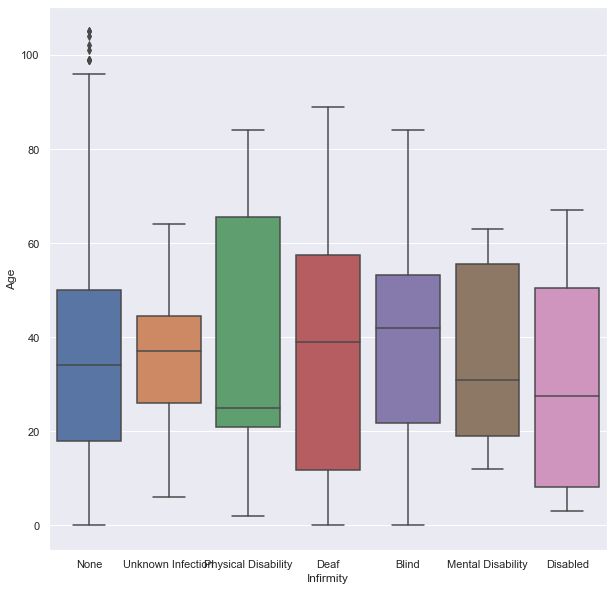

In [150]:
plt.figure(figsize=(10,10))
sns.boxplot(x=census_data["Infirmity"], y=census_data["Age"],data=census_data)

## religion

In [76]:
# to bring out all religion
census_data['Religion'].unique()

array(['Catholic', 'None', 'Christian', 'Muslim', 'Methodist', nan,
       'Sikh', 'Jewish', 'Private', 'Jedi', 'Hindu', 'Agnostic', 'Bahai',
       ' ', 'Undecided', 'Sith'], dtype=object)

In [77]:
# none does not have any disability, change empty space to none

census_data['Religion'] = census_data['Religion'].replace({' ':'None', np.nan:'None'})

In [78]:
# use np with nan since no brackets on it
census_data['Religion'].unique()

array(['Catholic', 'None', 'Christian', 'Muslim', 'Methodist', 'Sikh',
       'Jewish', 'Private', 'Jedi', 'Hindu', 'Agnostic', 'Bahai',
       'Undecided', 'Sith'], dtype=object)

In [79]:
# Undecided and Sith were also converted to none
#census_data['Religion'] = census_data['Religion'].replace({'Undecided ':'None', 'Sith':'None'})
census_data['Religion'] = census_data['Religion'].replace({'Undecided':'None'})

In [145]:
census_data['Religion'] = census_data['Religion'].replace({'Sith':'None'})

In [146]:
# use np with nan since no brackets on it
census_data['Religion'].unique()

array(['Catholic', 'None', 'Christian', 'Muslim', 'Methodist', 'Sikh',
       'Jewish', 'Private', 'Jedi', 'Hindu', 'Agnostic', 'Bahai'],
      dtype=object)

In [81]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8226 non-null   int64 
 1   Street                         8226 non-null   object
 2   First Name                     8226 non-null   object
 3   Surname                        8226 non-null   object
 4   Age                            8226 non-null   int64 
 5   Relationship to Head of House  8226 non-null   object
 6   Marital Status                 8226 non-null   object
 7   Gender                         8226 non-null   object
 8   Occupation                     8226 non-null   object
 9   Infirmity                      8226 non-null   object
 10  Religion                       8226 non-null   object
 11  Age_Group                      8226 non-null   object
dtypes: int64(2), object(10)
memory usage: 771.3+ KB


In [82]:
census_data[census_data['Religion']=='Undecided']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group


In [147]:
census_data.Religion.unique()

array(['Catholic', 'None', 'Christian', 'Muslim', 'Methodist', 'Sikh',
       'Jewish', 'Private', 'Jedi', 'Hindu', 'Agnostic', 'Bahai'],
      dtype=object)

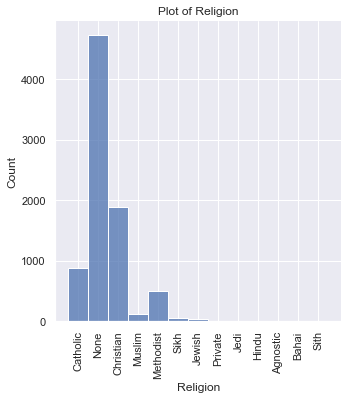

In [85]:
ax = sns.displot(x=census_data['Religion'], data=census_data)
plt.title("Plot of Religion")
plt.xticks(rotation=90)
plt.show()

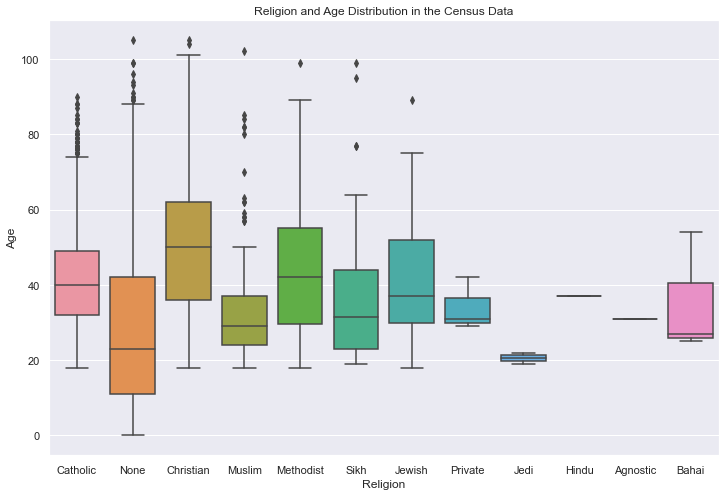

In [148]:
plt.figure(figsize = (12,8))
box = sns.boxplot(x = census_data['Religion'], y = census_data['Age'])
box.set(xlabel ='Religion', ylabel = 'Age', title = 'Religion and Age Distribution in the Census Data')
plt.show()

In [87]:
# The predominant religion is None hence there is no high demand for a second church from the plot,
# however it is worthy of note that the population of christains is on the increase.
# from the boxplot, majority of people with None religion is concentrated btw ages of 14 to 22 meaning that higher percentage of the population has no religion.

# Birthrate

#### Birthrate = (Number of lives births occuring in the year)/(Average population in the year) ×10000

In [88]:
child_zero = census_data[census_data['Age'] == 0]

In [89]:
len(child_zero)

72

In [90]:
birth_rate = (len(child_zero)/len(census_data)) * 10000
print('The Birthrate in the census is',round(birth_rate), 'per 10000')

The Birthrate in the census is 88 per 10000


# Evolving Birthrate

In [91]:
child_4 = census_data[census_data['Age'] == 4]
len(child_4)

102

In [92]:
Evol_birth_rate = (len(child_4)/len(census_data)) * 10000
print('The Evolving Birthrate in the census is', round(Evol_birth_rate),'per 10000')

The Evolving Birthrate in the census is 124 per 10000


# Death Rate

##### Deathrate = (Number of lives Death occuring in the year)/(Average population in the year) ×10000

In [170]:
old_pop = census_data[census_data['Age'].between(65,107)].groupby('Age').size().sort_index(ascending=False)
old_pop

Age
105     2
104     1
102     1
101     1
99      5
96      2
95      2
94      2
93      2
92      2
91      2
90      3
89      8
88      9
87      6
86     15
85     12
84     23
83     22
82     17
81     21
80     18
79     24
78     36
77     35
76     43
75     30
74     57
73     66
72     40
71     52
70     48
69     59
68     51
67     54
66     55
65     52
dtype: int64

In [94]:
# shift the ages up one to mimic last year's 'counts' per age

calculatedages = old_pop.shift(-1)
calculatedages

Age
105     1.0
104     1.0
102     1.0
101     5.0
99      2.0
96      2.0
95      2.0
94      2.0
93      2.0
92      2.0
91      3.0
90      8.0
89      9.0
88      6.0
87     15.0
86     12.0
85     23.0
84     22.0
83     17.0
82     21.0
81     18.0
80     24.0
79     36.0
78     35.0
77     43.0
76     30.0
75     57.0
74     66.0
73     40.0
72     52.0
71     48.0
70     59.0
69     51.0
68     54.0
67     55.0
66     52.0
65      NaN
dtype: float64

In [95]:
# calculate the difference between old pop and calculated ages

difference = old_pop - calculatedages

# convert to a dataframe

difference = difference.reset_index(name='Count')

deaths = difference[difference['Count'] < 0]
deaths

,Age,Count
3,101,-4.0
10,91,-1.0
11,90,-5.0
12,89,-1.0
14,87,-9.0
16,85,-11.0
19,82,-4.0
21,80,-6.0
22,79,-12.0
24,77,-8.0


In [96]:
deaths['Count'].sum()

-124.0

In [97]:
death_rate = abs(((deaths['Count']).sum())/len(census_data))*10000
print('The Death rate in the census is',round(death_rate), 'per 10000')

The Death rate in the census is 151 per 10000


# GROWTH RATE

In [98]:
growth_rate = round(birth_rate - death_rate)

In [99]:
print(f"Growth Rate per 10000: {round(growth_rate)}")
print(f"Growth Rate as Percentage 10000: {round(growth_rate)/10}%")

Growth Rate per 10000: -63
Growth Rate as Percentage 10000: -6.3%


# MIGRATION RATE

In [100]:
len(census_data[(census_data['Relationship to Head of House'] == 'Vistors') & (census_data['Marital Status'] == 'Single')])

0

In [101]:
print('The immigration rate per ten thousand is ',len(census_data[(census_data['Relationship to Head of House'] == 'Lodger') & (census_data['Marital Status'] == 'Single')])/len(census_data)*10000)

The immigration rate per ten thousand is  224.896669097982


# EMIGRATION (Using divorce - married)

In [102]:
married = len(census_data[census_data['Marital Status'] == 'Married']) 

In [103]:
divorced = len(census_data[census_data['Marital Status'] == 'Divorced'])

In [104]:
print('The emigration rate per ten thousand is ',(married - divorced)/len(census_data)*10000)

The emigration rate per ten thousand is  1776.075857038658


In [105]:
!pip install pandas-profiling

In [106]:
import pandas_profiling

In [107]:
from pandas_profiling import ProfileReport

In [108]:
ProfileReport(census_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Employement/Unemployment Distribution

In [109]:
EmploymentStatus = []

for info in census_data['Occupation']:
    if info == 'Student':
        EmploymentStatus.append('Student')
    elif info == 'University Student':
        EmploymentStatus.append('University Student')
    elif info == 'Child':
        EmploymentStatus.append('Child')
    elif info == 'Unemployed':
        EmploymentStatus.append('Unemployed')
    elif 'Retired' in info:
        EmploymentStatus.append('Retired')
    else:
        EmploymentStatus.append('Employed')
            

In [110]:
#casting the 'Employment Status' into the census data
census_data['Employment Status'] = EmploymentStatus

In [111]:
census_data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group,Employment Status
0,1,Albert Village,Maria,Wood,49,Head,Divorced,Female,Chiropodist,None,Catholic,45-49,Employed
1,2,Albert Village,Mohammed,Rose,65,Head,Widowed,Male,"Lecturer, further education",None,None,65-69,Employed
2,3,Albert Village,Joe,Smith,23,Head,Single,Male,"Investment banker, operational",None,None,20-24,Employed
3,3,Albert Village,Zoe,Daly,61,None,Single,Female,"Scientist, research (medical)",None,None,60-64,Employed
4,3,Albert Village,Dominic,Naylor,54,None,Single,Male,Microbiologist,None,Christian,50-54,Employed


In [112]:
# use .unique() to confirm the data is cleaned properly
census_data['Employment Status'].unique()

array(['Employed', 'Retired', 'Unemployed', 'University Student',
       'Student', 'Child'], dtype=object)

Employed              4345
Student               1608
Retired                679
University Student     576
Unemployed             554
Child                  464
Name: Employment Status, dtype: int64


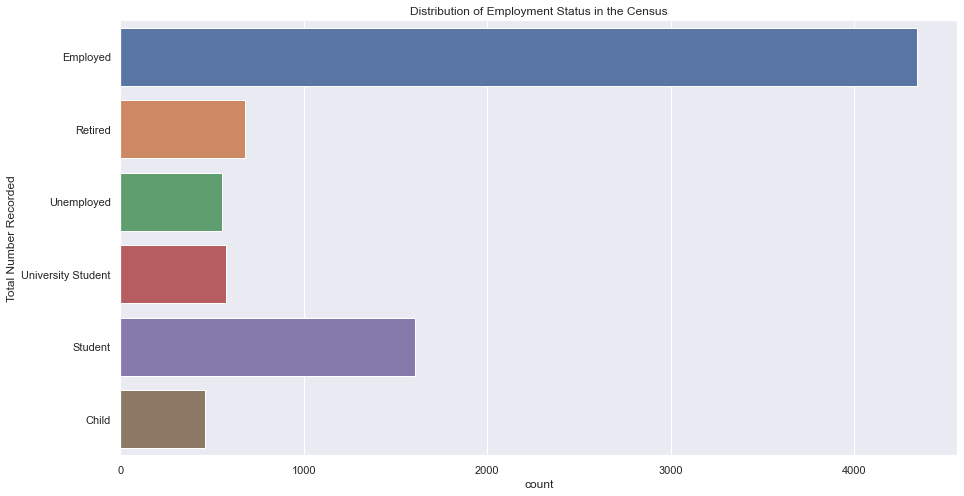

In [113]:

print(census_data['Employment Status'].value_counts())

plt.figure(figsize = (15,8))
sns.countplot(y = 'Employment Status', data=census_data)

plt.title('Distribution of Employment Status in the Census')
plt.ylabel('Total Number Recorded')
plt.show()

In [115]:
all_unemployed = census_data[census_data['Employment Status']=='Unemployed']

In [116]:
#calculate the number of old age <65 that is umemployed
len(all_unemployed)

554

In [117]:
young_unemployed = census_data[(census_data['Age'] < 65) & (census_data['Employment Status'] == 'Unemployed')]

In [118]:
print('percentage of working-class age in the unemployment is ', round(len(young_unemployed)/len(all_unemployed)*100), '%')

percentage of working-class age in the unemployment is  91 %
